In [4]:
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
import tensorflow_datasets as tfds
import tensorflow
import tensorflow_addons as tfa
from tensorflow.keras.models import Sequential
from tensorflow.keras import (
    models,
    layers,
) 
from matplotlib import pyplot as plt
import numpy as np
import random

In [5]:
cifar_10_labels = {
    0: 'airplane',
    1: 'automobile',
    2: 'bird',
    3: 'cat',
    4: 'deer',
    5: 'dog',
    6: 'frog',
    7: 'horse',
    8: 'ship',
    9: 'truck'
    }

#### Random Number Generation

In [6]:
class RandomIntegers():
    def __init__(self):
        pass
    
    def generate(self, n, length):
        # Generate n unique random integers between 0 and length
        random_integers = random.sample(range(length), n)
        
        return random_integers

#### CIFAR-10
###### CIFAR-10 dataset consists of 60000 32×32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

In [7]:
(ds_train, ds_test), ds_info = tfds.load(
    'cifar10',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)
ds_train_sample = np.array(list(ds_train.take(100)))

2023-08-12 12:28:56.230799: W tensorflow/core/kernels/data/cache_dataset_ops.cc:854] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


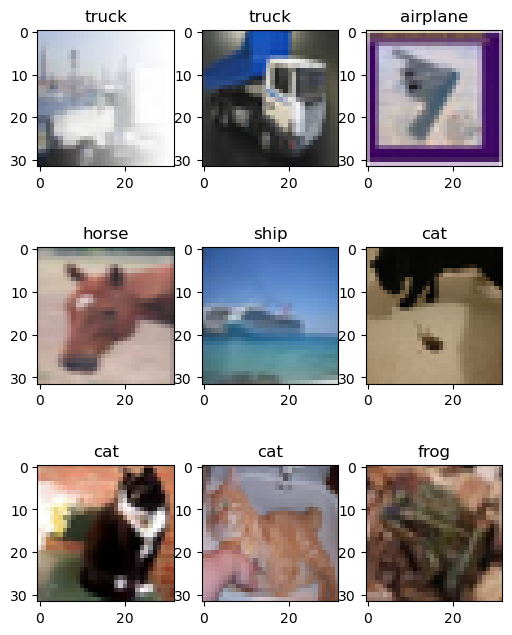

In [8]:
def display_images():
    random_integers = RandomIntegers().generate(9, len(ds_train_sample))
    plt.figure(figsize=(6, 8))
    counter = 0
    for i in random_integers:
        # define subplot
        plt.subplot(330 + 1 + counter)
        counter += 1
        # plot raw pixel data
        plt.imshow(ds_train_sample[i][0])
        plt.title(cifar_10_labels[ds_train_sample[i][1].numpy()])
    # show the figure
    plt.show()
display_images()

#### Preprocess image

In [9]:
# Normalize the images
def normalize_img(image, label):
    """Normalizes images: `uint8` -> `float32`."""
    return tf.cast(image, tf.float64) / 255., label


In [10]:
ds_train = ds_train.map(
    normalize_img, 
    num_parallel_calls=tf.data.AUTOTUNE
)
ds_train = ds_train.cache()
ds_train = ds_train.shuffle(ds_info.splits['train'].num_examples)
ds_train = ds_train.batch(128)
ds_train = ds_train.prefetch(tf.data.AUTOTUNE)

In [11]:
ds_test = ds_test.map(
    normalize_img, 
    num_parallel_calls=tf.data.AUTOTUNE
)
ds_test = ds_test.batch(128)
ds_test = ds_test.cache()
ds_test = ds_test.prefetch(tf.data.AUTOTUNE)

#### Build Model

In [16]:
model = tensorflow.keras.models.Sequential([
    tensorflow.keras.layers.Flatten(input_shape=(32, 32, 3)),
    tensorflow.keras.layers.Dense(128, activation='relu'),
    tensorflow.keras.layers.Dense(10, activation='softmax')
])

#### Compile Model

In [17]:
# model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

#### Model training

In [18]:
epochs = 25
history = model.fit(ds_train,
                    epochs=epochs,
                    batch_size=512,
                    validation_data=ds_test)

Epoch 1/25
391/391 [==============================] - 3s 6ms/step - loss: 2.2061 - sparse_categorical_accuracy: 0.2412 - val_loss: 1.9740 - val_sparse_categorical_accuracy: 0.2958
Epoch 2/25
391/391 [==============================] - 2s 6ms/step - loss: 1.9428 - sparse_categorical_accuracy: 0.3060 - val_loss: 1.9351 - val_sparse_categorical_accuracy: 0.3178
Epoch 3/25
391/391 [==============================] - 2s 5ms/step - loss: 1.8771 - sparse_categorical_accuracy: 0.3391 - val_loss: 1.8475 - val_sparse_categorical_accuracy: 0.3474
Epoch 4/25
391/391 [==============================] - 3s 7ms/step - loss: 1.8450 - sparse_categorical_accuracy: 0.3528 - val_loss: 1.8528 - val_sparse_categorical_accuracy: 0.3408
Epoch 5/25
391/391 [==============================] - 2s 5ms/step - loss: 1.8282 - sparse_categorical_accuracy: 0.3611 - val_loss: 1.8019 - val_sparse_categorical_accuracy: 0.3707
Epoch 6/25
391/391 [==============================] - 2s 5ms/step - loss: 1.8241 - sparse_categorica

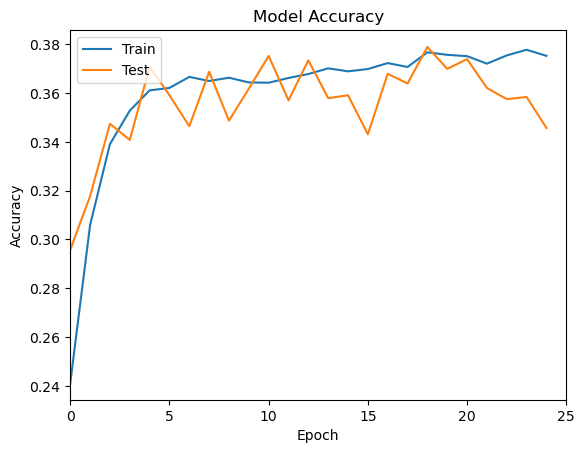

In [19]:
# Plot the accuracy from the training history
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.xlim(0,epochs)
plt.show()